## basic visualization

In [1]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

# print multiple output in single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv("StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
df.describe(include="all")

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6607.000000,6607.000000,6607,6607,6607,6607.00000,6607.000000,6607,6607,6607.000000,6607,6529,6607,6607,6607.000000,6607,6517,6540,6607,6607.000000
unique,NaN,NaN,3,3,2,NaN,NaN,3,2,NaN,3,3,2,3,NaN,2,3,3,2,NaN
top,NaN,NaN,Medium,Medium,Yes,NaN,NaN,Medium,Yes,NaN,Low,Medium,Public,Positive,NaN,No,High School,Near,Male,NaN
freq,NaN,NaN,3362,3319,3938,NaN,NaN,3351,6108,NaN,2672,3925,4598,2638,NaN,5912,3223,3884,3814,NaN
mean,19.975329,79.977448,NaN,NaN,NaN,7.02906,75.070531,NaN,NaN,1.493719,NaN,NaN,NaN,NaN,2.967610,NaN,NaN,NaN,NaN,67.235659
std,5.990594,11.547475,NaN,NaN,NaN,1.46812,14.399784,NaN,NaN,1.230570,NaN,NaN,NaN,NaN,1.031231,NaN,NaN,NaN,NaN,3.890456
min,1.000000,60.000000,NaN,NaN,NaN,4.00000,50.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,55.000000
25%,16.000000,70.000000,NaN,NaN,NaN,6.00000,63.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,65.000000
50%,20.000000,80.000000,NaN,NaN,NaN,7.00000,75.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,67.000000
75%,24.000000,90.000000,NaN,NaN,NaN,8.00000,88.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,69.000000


In [5]:
df.shape

(6607, 20)

In [6]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [7]:
df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

In [8]:
for column in df.columns:
    df[column].value_counts().keys()

Index([20, 19, 21, 23, 22, 18, 17, 24, 16, 15, 25, 14, 26, 27, 13, 12, 28, 11,
       29, 30, 10,  9, 31,  8, 32,  7, 33, 34,  5, 35,  4,  6,  3, 36, 38, 39,
        2, 37,  1, 43, 44],
      dtype='int64', name='Hours_Studied')

Index([ 67,  98,  76,  77,  64,  94,  91,  84,  79,  82,  69,  68,  80,  96,
        73,  81,  93,  72,  74,  78,  61,  95,  71,  89,  97,  70,  65,  83,
        90,  63,  88,  92,  99,  62,  87,  86,  75,  85,  66,  60, 100],
      dtype='int64', name='Attendance')

Index(['Medium', 'High', 'Low'], dtype='object', name='Parental_Involvement')

Index(['Medium', 'High', 'Low'], dtype='object', name='Access_to_Resources')

Index(['Yes', 'No'], dtype='object', name='Extracurricular_Activities')

Index([7, 8, 6, 9, 5, 10, 4], dtype='int64', name='Sleep_Hours')

Index([ 66,  94,  96,  85,  71,  53,  59,  82,  76,  88,  73,  86,  54,  91,
        65,  70,  52,  63,  74,  67,  80,  68,  64,  75,  98,  89,  78,  95,
        93,  69,  79,  51,  92,  83,  99,  57,  55,  81,  62,  87,  61,  90,
        77,  84,  60,  72,  58,  56,  97, 100,  50],
      dtype='int64', name='Previous_Scores')

Index(['Medium', 'Low', 'High'], dtype='object', name='Motivation_Level')

Index(['Yes', 'No'], dtype='object', name='Internet_Access')

Index([1, 2, 0, 3, 4, 5, 6, 7, 8], dtype='int64', name='Tutoring_Sessions')

Index(['Low', 'Medium', 'High'], dtype='object', name='Family_Income')

Index(['Medium', 'High', 'Low'], dtype='object', name='Teacher_Quality')

Index(['Public', 'Private'], dtype='object', name='School_Type')

Index(['Positive', 'Neutral', 'Negative'], dtype='object', name='Peer_Influence')

Index([3, 2, 4, 1, 5, 0, 6], dtype='int64', name='Physical_Activity')

Index(['No', 'Yes'], dtype='object', name='Learning_Disabilities')

Index(['High School', 'College', 'Postgraduate'], dtype='object', name='Parental_Education_Level')

Index(['Near', 'Moderate', 'Far'], dtype='object', name='Distance_from_Home')

Index(['Male', 'Female'], dtype='object', name='Gender')

Index([ 68,  66,  67,  65,  69,  70,  64,  71,  63,  72,  62,  61,  73,  74,
        60,  75,  59,  58,  76,  80,  77,  94,  86,  82,  78,  57,  84,  79,
        89,  98,  88,  97,  95,  93,  87,  99,  92,  83, 100,  55, 101,  91,
        96,  85,  56],
      dtype='int64', name='Exam_Score')

## data cleaning and pipeline

In [9]:
# sperating Numerical features from Categorical features
num_features = []
cat_features = []
for column in df.columns:
    if df[column].value_counts().keys().dtype == "O":
        cat_features.append(column)
    else:
        num_features.append(column)
num_features.remove("Exam_Score")
num_features
cat_features

['Hours_Studied',
 'Attendance',
 'Sleep_Hours',
 'Previous_Scores',
 'Tutoring_Sessions',
 'Physical_Activity']

['Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Motivation_Level',
 'Internet_Access',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender']

In [10]:
numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

In [11]:
preprocess = ColumnTransformer([
    ("num",numeric_pipe, num_features),
    ("cat", categorical_pipe, cat_features)
])

In [12]:
y = df["Exam_Score"]
X = df.drop(columns=["Exam_Score"])

## Splitting data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=None
)

In [32]:
model = Pipeline([
    ("prep", preprocess),
    ("linreg", LinearRegression())
])

poly_model = Pipeline([
    ("prep", preprocess),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("reg", LinearRegression())
])

## Training data

In [33]:
model.fit(X_train, y_train)
poly_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Hours_Studied',
                                                   'Attendance', 'Sleep_Hours',
                                                   'Previous_Scores',
                                                   'Tutoring_Sessions',
                                                   'Physical_Activity']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Parental_Involvement',
                                                   'Access_to_Resources',
                                                   'Extracurricular_Activities',
                                                   'Motivation_Level',
                                                   'Internet_Access',
                                                   'Family_Income',
                                                   'Teacher_Quality',
                                                   'School_Type',
                                                   'Peer_Influence',
                                                   'Learning_Disabilities',
                                                   'Parental_Education_Level',
                                                   'Distance_from_Home',
                                                   'Gender'])])),
                ('linreg', LinearRegression())])

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Hours_Studied',
                                                   'Attendance', 'Sleep_Hours',
                                                   'Previous_Scores',
                                                   'Tutoring_Sessions',
                                                   'Physical_Activity']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Parental_Involvement',
                                                   'Access_to_Resources',
                                                   'Extracurricular_Activities',
                                                   'Motivation_Level',
                                                   'Internet_Access',
                                                   'Family_Income',
                                                   'Teacher_Quality',
                                                   'School_Type',
                                                   'Peer_Influence',
                                                   'Learning_Disabilities',
                                                   'Parental_Education_Level',
                                                   'Distance_from_Home',
                                                   'Gender'])])),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('reg', LinearRegression())])

## Results

In [34]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear Regression model:")
print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)
print("_"*50)

y_poly_pred = poly_model.predict(X_test)
mae = mean_absolute_error(y_test, y_poly_pred)
rmse = np.sqrt(mean_absolute_error(y_test, y_poly_pred))
r2 = r2_score(y_test, y_poly_pred)


print("polynomial Regression model:")
print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)

Linear Regression model:
MAE : 0.45239200896259757
RMSE: 1.804444509272284
R²  : 0.7696495724907312
__________________________________________________
polynomial Regression model:
MAE : 0.6416656289893968
RMSE: 0.8010403416741237
R²  : 0.7471205766472638


Text(0.5, 0, 'Actual Exam Score')

Text(0, 0.5, 'Predicted Exam Score')

Text(0.5, 1.0, 'Actual vs\xa0Predicted (Linear Regression)')

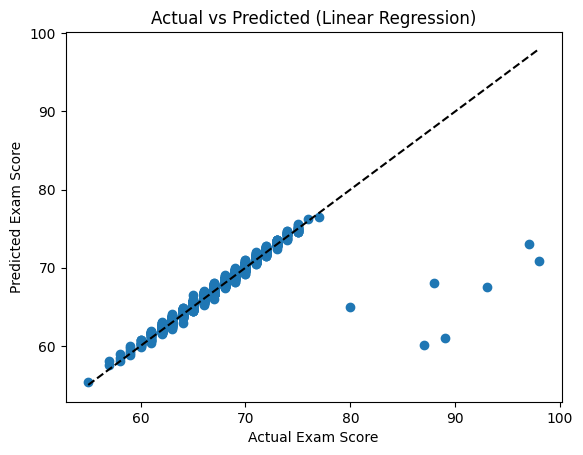

Text(0.5, 0, 'Actual Exam Score')

Text(0, 0.5, 'Predicted Exam Score')

Text(0.5, 1.0, 'Actual vs Predicted (Polynomial Regression)')

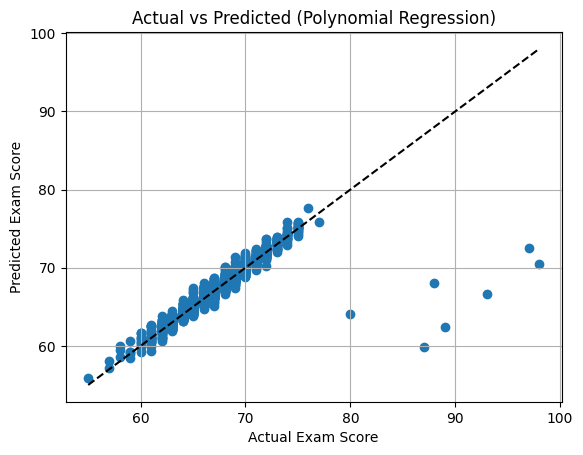

In [35]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted (Linear Regression)")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], "k--")  # 45° reference line
plt.show()



plt.scatter(y_test, y_poly_pred)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted (Polynomial Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--")
plt.grid(True)
plt.show()


# linear regression is better than the polynomial regression 